# Introduction to Data Analysis project final part
## Kassymbayev Kuanysh BDA-1904
## General analysis of games on Steam platform

### Content
1. Introduction: Steam platform
2. Data description and objectives
3. Research questions
4. Data analysis and visualization 
5. Conclusion

## 1. Introduction: Steam platform

Steam is a video game digital distribution service by Valve. It was launched as a standalone software client in September 2003 as a way for Valve to provide automatic updates for their games, and expanded to include games from third-party publishers. Steam has also expanded into an online web-based and mobile digital storefront. Steam offers digital rights management (DRM), server hosting, video streaming, and social networking services. It also provides the user with installation and automatic updating of games, and community features such as friends lists and groups, cloud storage, and in-game voice and chat functionality.

Source(https://en.wikipedia.org/wiki/Steam_(service))

## 2. Data description and objectives

Dataset was gathered around May 2019, it contains most games on the store released prior to that date. Unreleased titles were removed as well as many non-games like software, though some may have slipped through. It will be interesting to consider some things that we didn't know

In dataset we have several csv files:
   In the general steam.csv we have:

   + appid - identifier for each app
   + name - title of game
   + release_date - date of release in format YYYY-MM-DD
   + english - english is supported in game (1 if yes)
   + developer - name of game developer
   + publisher - company which stored this game in steam platform
   + platform - supported platforms for games like macOS, Windows
   + required_age - minimum required age for game by PEGI UK standards
   + categories - list of game categories (single-player, multi-player and etc.)
   + genres - list of game genres (Action,Casual and etc.)
   + steamspy_tags - steamspy game tags, similar to genres but community voted, e.g. action;adventure
   + achievements - how many achievements game have (challenges for players)
   + positive_ratings - count of positive ratings for the game (in steam you can rate the game like positive or negative)
   + negative_ratings - count of negative ratings
   + average_playtime - average user playtime
   + median_playtime - median user playtime
   + owners - estimated number of owners. Contains lower and upper bound (like 20000-50000)
   + price - current full price of title in GBP


## 3. Research questions


   + Analyze each genres for reviews (review = positive ratings + negative ratings)
   
   + Analyze relationship between average playtime with price
   
   + Analyze games which have required age for age piechart
   
   + Analyze count of free to play games over the years
   
   + Analyze list of top developers accordint to the count of games

## 4. Data analysis and visualization 

In [1]:
import numpy as np #executing numpy
import pandas as pd #executring pandas, data processing
from matplotlib import rcParams #for customizing the properties and default styles
import matplotlib.pyplot as plt #for plotting 
import seaborn as sns #data visualization


In [2]:
#Customizing figure sizes in inches
rcParams['figure.figsize'] = 8,2
rcParams['axes.titlesize'] = 20
rcParams['axes.labelsize'] = 20
rcParams['xtick.labelsize'] = 16
rcParams['ytick.labelsize'] = 16
rcParams['legend.fontsize'] = 10

In [3]:
#First of all let's check our main csv file

df = pd.read_csv('steam.csv')
print(f'How many games in steam.csv file we have: {len(df)}')

How many games in steam.csv file we have: 27075


In [4]:
#Let's take a quick look at what the data looks like:
df.dataframe = 'steam.csv'
df.head(10)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99
5,60,Ricochet,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Valve Anti-Ch...,Action,Action;FPS;Multiplayer,0,2758,684,175,10,5000000-10000000,3.99
6,70,Half-Life,1998-11-08,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Online Multi-Player...,Action,FPS;Classic;Action,0,27755,1100,1300,83,5000000-10000000,7.19
7,80,Counter-Strike: Condition Zero,2004-03-01,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,Action;FPS;Multiplayer,0,12120,1439,427,43,10000000-20000000,7.19
8,130,Half-Life: Blue Shift,2001-06-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player,Action,FPS;Action;Sci-fi,0,3822,420,361,205,5000000-10000000,3.99
9,220,Half-Life 2,2004-11-16,1,Valve,Valve,windows;mac;linux,0,Single-player;Steam Achievements;Steam Trading...,Action,FPS;Action;Sci-fi,33,67902,2419,691,402,10000000-20000000,7.19


 1. Analyze relation between price and positive rate (positive rate = positive rate/all reviews(with negatives)


First of all what we should do it's reviews. I had decided to define review as (reviews = positive ratings + negative ratings)
And percentage of positive rate like (positiveRatings/reviews)

In [5]:
df = df.assign(**{'reviews':df.positive_ratings + df.negative_ratings})
df = df.assign(**{'positive_rate':df.positive_ratings / df.reviews})

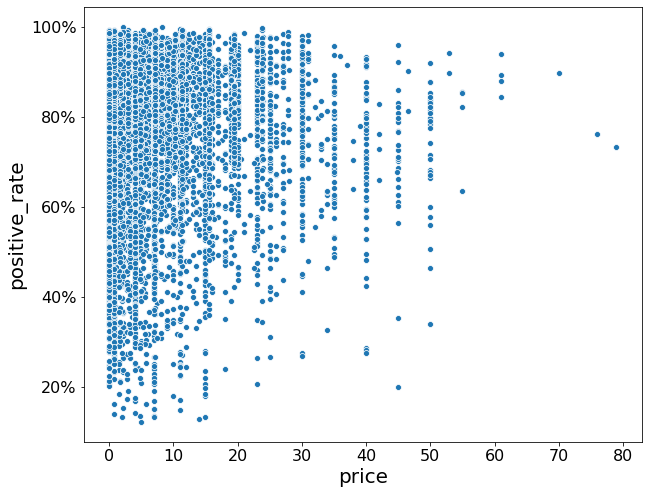

In [6]:
#I had decide to see it in scatter plot
#And I took games only that have more than 100 reviews and cheeper than 100 dollars
plt.figure(figsize=(10,8))

g = sns.scatterplot(x="price", y="positive_rate", data=df[(df.price <= 100) & (df.reviews > 100)])#specifying data parameter with additinal conditions

vals = g.get_yticks()
_ = g.set_yticklabels(['{:,.0%}'.format(x) for x in vals])# Setting the y-tick labels with list of string labels.

There we can see that free to play games (free games) have different positive rate. I guess that it's because most people plays 
exactly free games. But 1 more thing that we can see that minimum of positive rate increases when price increses. This may be affected by the number of players and the quality of the games. Between price ~35 and ~45 we can see it

2.Analyze relationship between average playtime with price

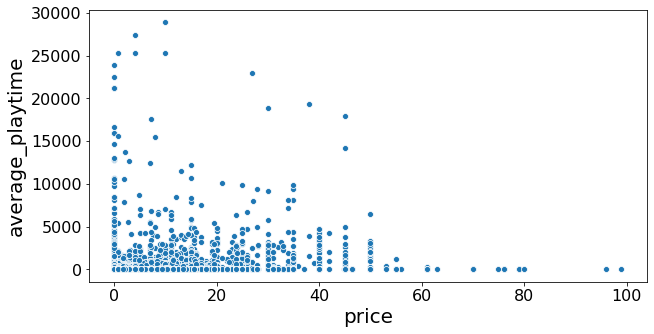

In [7]:
#I think that it will be better with the scatter plot to see the relation between them
#I needn't to do additional tasks so it will looks like:

plt.figure(figsize=(10,5))

#I also took average playtime < 30000 for seeing more details and price cheaper than 100
g = sns.scatterplot(x="price", y="average_playtime", data=df[(df.price <= 100) & (df.average_playtime < 30000)])

vals = g.get_yticks()


Here we can see that games with price 0 so free to play games have most gamers with average playtimes. And most games with price between 0 and ~30 have same average playime (2000) and it says that in price between 0 and 30 it doesn't matter how much it costs, most gamers play that games. For free to play games, We can see that they have constant average playtime and popular among gamers, expecially in steam.

3. Analyze games which have required age for age piechart

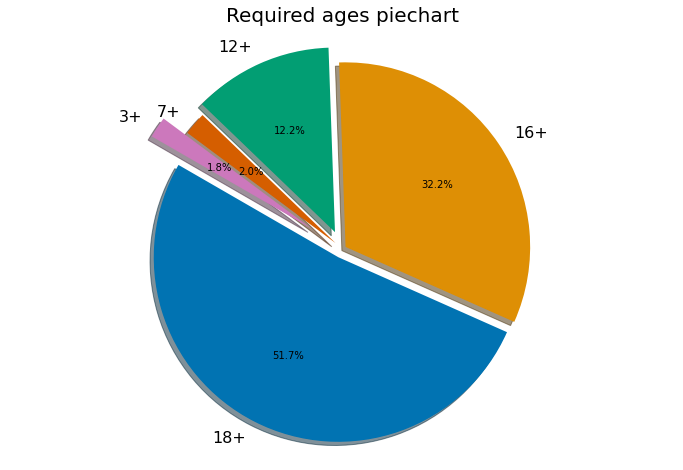

In [8]:
#For question about required age i had decided to take piechart, it will be good to see the information

plt.figure(figsize=(12,8))


dict_of_ages = dict(df.required_age.value_counts())

labels_of_ages = '18+', '16+', '12+', '7+', '3+'#specifying list of required ages

sizes = [dict_of_ages[18], dict_of_ages[16], dict_of_ages[12], dict_of_ages[7], dict_of_ages[3]] #determine the sizes

colors = ['lightgreen', 'blue']
explode = (0.05, 0.02, 0.1, 0.05, 0.2)  # exploding  slices

# plotting

with sns.color_palette("colorblind"): #generatting color palettes
    plt.pie(sizes, explode=explode, labels=labels_of_ages, 
autopct='%1.1f%%', shadow=True, startangle=150)

plt.title('Required ages piechart')
plt.axis('equal')# Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

From that piechart we can see that in steam platform there are various games from 3+ rating to 18+. Important thing that we can get from piechart that 83.9% (18+ - 51.7%, 16+ - 32.2%) of games not for kids. Otherwise we see that 12+ (12.2%) games taking not a little place in steam platform. For games with ratings 3+ (1.8%) and 7+ (2.0%) do not take up much space in the platform, we must admit that steam is not for children.

4. Analyze count of free to play games over the years

First of all what i think about it's about color and i specified it before coding. I could do it in the beginning, but it doesn't matter.

In [30]:
palette = sns.color_palette("Blues_d")
default_color = palette[2]

I had decided that i will create function which will accept genre or category and show results of years

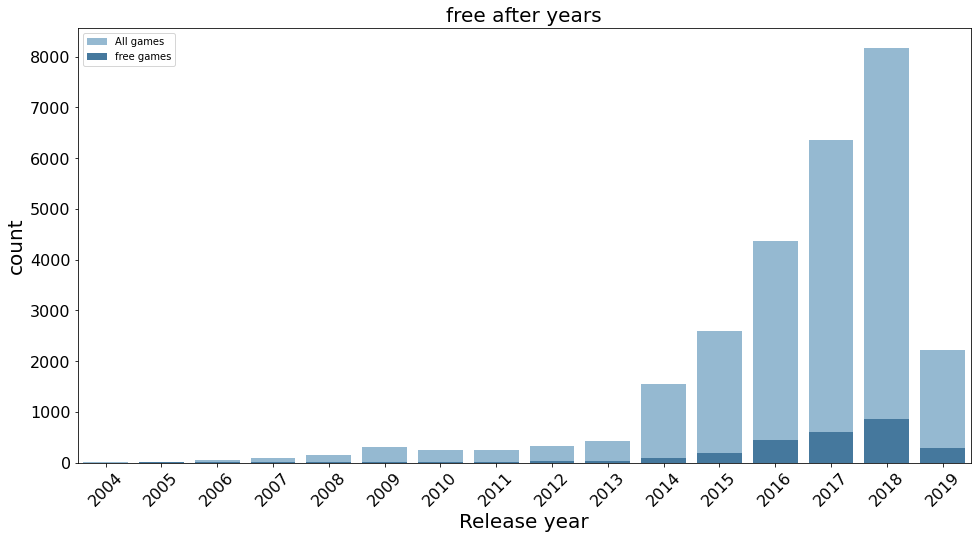

In [58]:
min_year = 2003 #setting lower limit of plot
truncated_df = df[df.release_date.dt.year>min_year] #accessor

def afteryears(df, column_name, palette=palette, rate_lim=None): #defining parametrs of our function

    fig = plt.figure(figsize=(16, 8)) #defining figure size
    
    xy_years = df.groupby(df.release_date.dt.year.rename('release_year'))\
        .agg('count').appid.rename('count') #creating additional features to set x,y for barplot
    avg = df.groupby(df.release_date.dt.year)[column_name].mean() #finding average values of column
    
    #plotting
    bar1 = sns.barplot(x=xy_years.index, y=xy_years, color=palette[5],label="All games") #defining x,y, color for all games in plot
    bar2 = sns.barplot(x=xy_years.index, y=xy_years * avg, color=palette[2], label=f"{column_name} games") #definig x,y, color for few games
    plt.legend()
    plt.xticks(rotation=45) #to normalize vision of years
    plt.title(f'{column_name} after years') #
    plt.xlabel('Release year')
    
 
    #testing
afteryears(truncated_df, 'free') #we defined what is 'free' at the beginnig

So finally we got our plot. As we can see from plot in years < 2009 general count of games was small. We can see free games from 2012 to the last. From 2012 to 2018 free to play games growing and in general count of games increasing. But in 2019 count of games, free games at low level. I think cause of it pause of popular developers and publisher for year. So from the plot i can conclude that free games estimates ~10% of all games in steam platform.

To increase functionality we should specify set of genres or category and we can use it for different purposes

In [49]:
genres_set = set() #taking set of genres
for i in df.genres.str.split(';'):
    genres_set.update(i)
genres_set


{'Accounting',
 'Action',
 'Adventure',
 'Animation & Modeling',
 'Audio Production',
 'Casual',
 'Design & Illustration',
 'Documentary',
 'Early Access',
 'Education',
 'Free to Play',
 'Game Development',
 'Gore',
 'Indie',
 'Massively Multiplayer',
 'Nudity',
 'Photo Editing',
 'RPG',
 'Racing',
 'Sexual Content',
 'Simulation',
 'Software Training',
 'Sports',
 'Strategy',
 'Tutorial',
 'Utilities',
 'Video Production',
 'Violent',
 'Web Publishing'}

In [50]:
d = dict() #saving and assigning to dataframe
genre_sets = df.genres.str.split(';').apply(set)
for genre in genres_set:
    d[genre] = genre_sets.apply(lambda row: genre in row)
df = df.assign(**d)

Now we can use our function to each genre to show updates after years

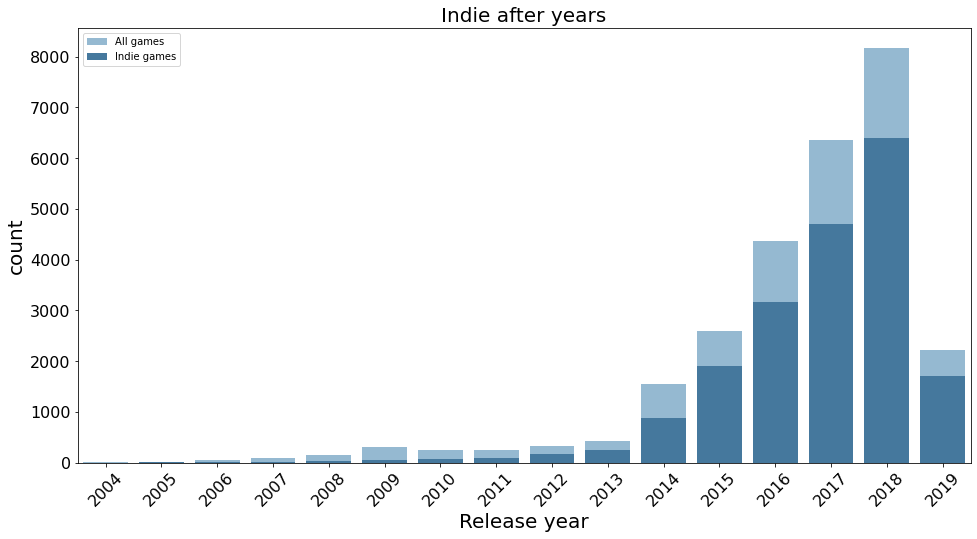

In [59]:
afteryears(truncated_df, 'Indie')

5. Analyze list of top developers

 In this question i will show top 15 developers around steam accordint ot count of games that they created

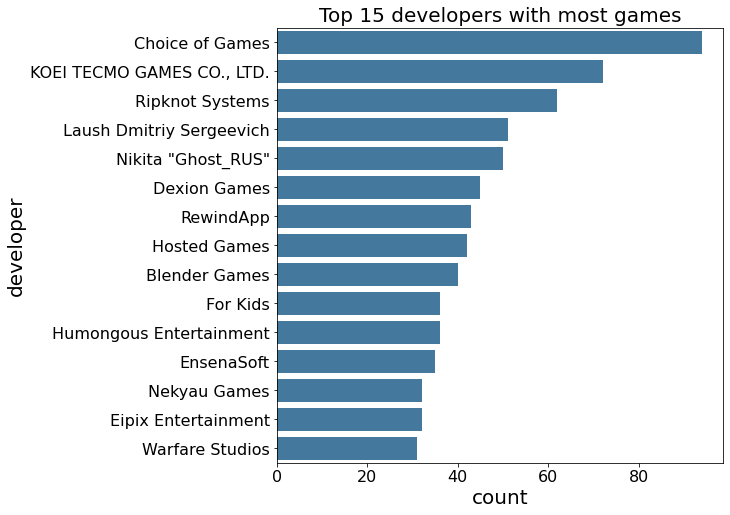

In [56]:
plt.figure(figsize=(8,8)) #defining size
top=15 #defining count of developers in top
plt.title(f'Top {top} developers with most games') #title

sns.countplot(y="developer", data=df,
             order=df.developer.value_counts().iloc[:top].index, 
             color=default_color) #countplotting 

Simple plot. However it contains information that we need. "Choice of Games" developer had created over 80 games and it's top 1 developer at the moment. Top 2 - "Koei Tecmo Games Co., LTD." with ~75 games. Top 3 - "Ripknot systems" with ~ 65 games. It's according to count so, all these developers are creators of "Indie" games. These ones are easy to creating and simple games. 

## 5. Conclusion

Based on analysis above, we can conclude several things about Steam platform.

First, free to play games have a lot of players, so they have different positive rate. Minimum of positive rate increases when price increses. This may be affected by the number of players and the quality of the games. 

Second, free to play games have most gamers with average playtimes. It doesn't matter how much it costs, most gamers play that games. For free to play games, We can see that they have constant average playtime and popular among gamers, expecially in steam.

Third, important thing that we can get from piechart that a lot of games not for kids. We must admit that steam is not for children.

Fourth, free to play games growing over the years and in general count of games increasing. But in one year we saw a low level of games in general. Cause of it pause of popular developers and publishers for year. We can conclude that free games estimates ~10% of all games in steam platform.

Finally, we saw top of developers according to the count of games. All these developers are creators of "Indie" games. These ones are easy to creating and simple games.